### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [6]:
#Load the Data
data = pd.read_csv('Downloads/coupons.csv')

2. Investigate the dataset for missing or problematic data.

In [7]:
#check data for nulls 
print(data.isna().sum())

#check data types
data.info()


destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  -----

3. Clean up nulls and nonnumeric data types

In [8]:
# Car column is problematic-  With less than 1% of car column populated the data set is too small and can be dropped.
data=data.drop('car',axis=1)

# Coupon Data (Bar, CarryAway, RestaurantLessThan20, Restaurant20to50) columns have some nulls, but < 2% are nan values, so it is safe to drop 
data=data.dropna()

#confirm actions with an info
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12079 entries, 22 to 12683
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12079 non-null  object
 1   passanger             12079 non-null  object
 2   weather               12079 non-null  object
 3   temperature           12079 non-null  int64 
 4   time                  12079 non-null  object
 5   coupon                12079 non-null  object
 6   expiration            12079 non-null  object
 7   gender                12079 non-null  object
 8   age                   12079 non-null  object
 9   maritalStatus         12079 non-null  object
 10  has_children          12079 non-null  int64 
 11  education             12079 non-null  object
 12  occupation            12079 non-null  object
 13  income                12079 non-null  object
 14  Bar                   12079 non-null  object
 15  CoffeeHouse           12079 non-nul

In [9]:
#convert income to numerical data
# replace string values to and convert age columnn to integer type to enable analysis
data.loc[data.income == 'Less than $12500','income']='12500'
data.loc[data.income == '$12500 - $24999','income']='25000'
data.loc[data.income == '$100000 or More','income']='125000'
data.loc[data.income == '$37500 - $49999','income']='50000'
data.loc[data.income == '$50000 - $62499','income']='62500'
data.loc[data.income == '$62500 - $74999','income']='75000'
data.loc[data.income == '$87500 - $99999','income']='100000'
data.loc[data.income == '$75000 - $87499','income']='87500'
data.loc[data.income == '$25000 - $37499','income']='37500'

data.astype({'income': 'int64'}).dtypes
data = data.astype({"income": int})
print(data['income'].value_counts())


37500     1919
25000     1728
125000    1692
50000     1689
62500     1565
12500     1014
75000      840
100000     818
87500      814
Name: income, dtype: int64


In [10]:
# convert age to numerical data to simplify analysis
data.loc[data.age == '50plus','age']='51'
data.loc[data.age == 'below21','age']='19'
data.astype({'age': 'int64'}).dtypes
data = data.astype({"age": int})

data.astype({'age': 'int64'}).dtypes
data = data.astype({"age": int})
print(data['age'].value_counts())


21    2537
26    2399
31    1925
51    1732
36    1253
41    1065
46     664
19     504
Name: age, dtype: int64


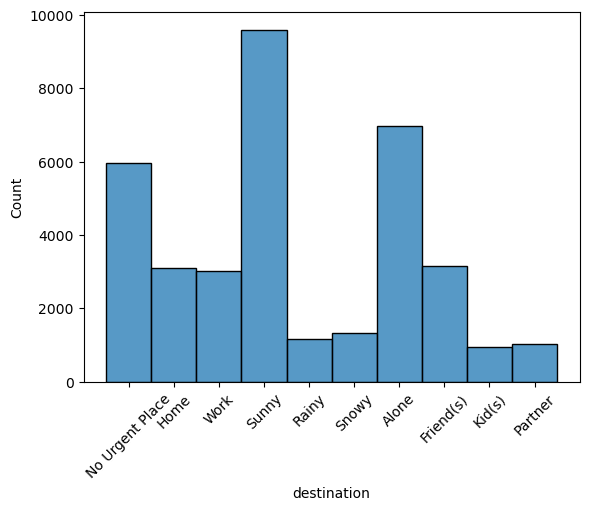

In [11]:
#Run Several Histograms to verify distributions and values. I combine them here to make it faster to review

sns.histplot(data=data, x="destination")
sns.histplot(data=data, x="weather")
sns.histplot(data=data, x="passanger")
plt.xticks(rotation=45);



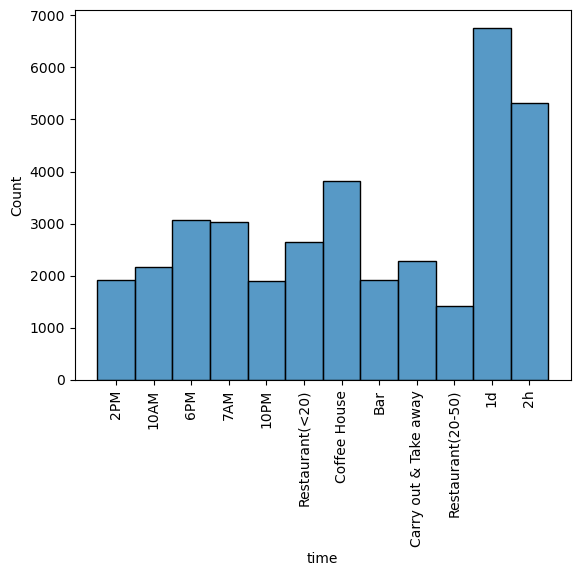

In [12]:
sns.histplot(data=data, x="time")
sns.histplot(data=data, x="coupon")
sns.histplot(data=data, x="expiration")
plt.xticks(rotation=90);


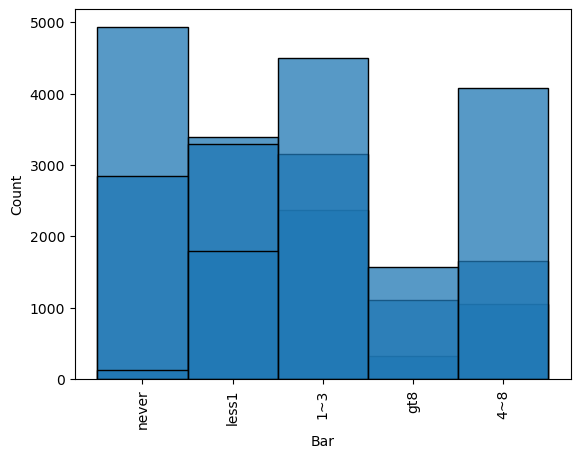

In [13]:
ax1=sns.histplot(data=data, x="Bar")
ax1=sns.histplot(data=data, x="CoffeeHouse")
ax1=sns.histplot(data=data, x="CarryAway")
plt.xticks(rotation=90);



5. Use a bar plot to visualize the `coupon` column.

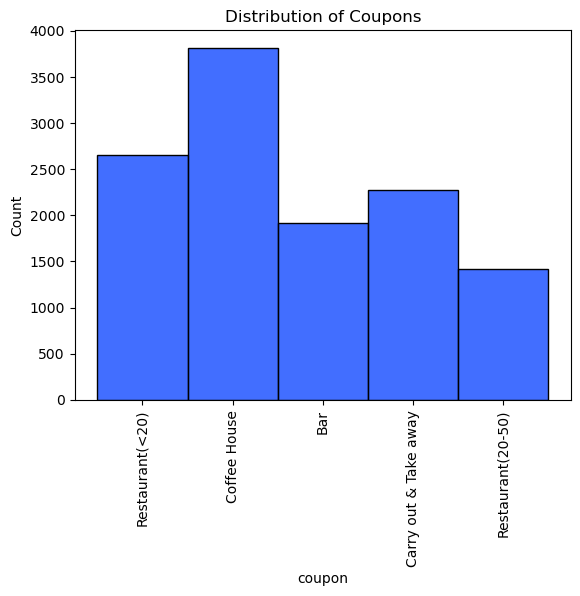

In [14]:
#sns.histplot(data=data, x="coupon",hue='coupon')
    
#plot with Seaborn
sns.set_palette("bright")
ax5=sns.histplot(data=data,x='coupon',multiple='dodge',legend='upper right')
ax5.set_title('Distribution of Coupons')
ax5.set_ylabel('Count')
ax5.tick_params(axis='x', rotation=90)
ax5.set_ylim()
ax5.plot();


6. Use a histogram to visualize the temperature column.

<AxesSubplot:xlabel='temperature', ylabel='Count'>

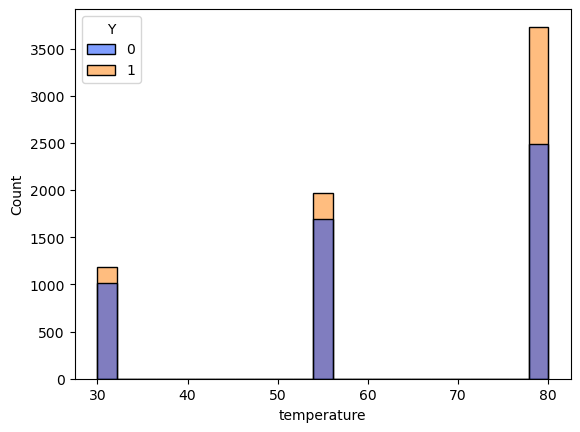

In [15]:
sns.histplot(data=data, x="temperature",hue='Y')

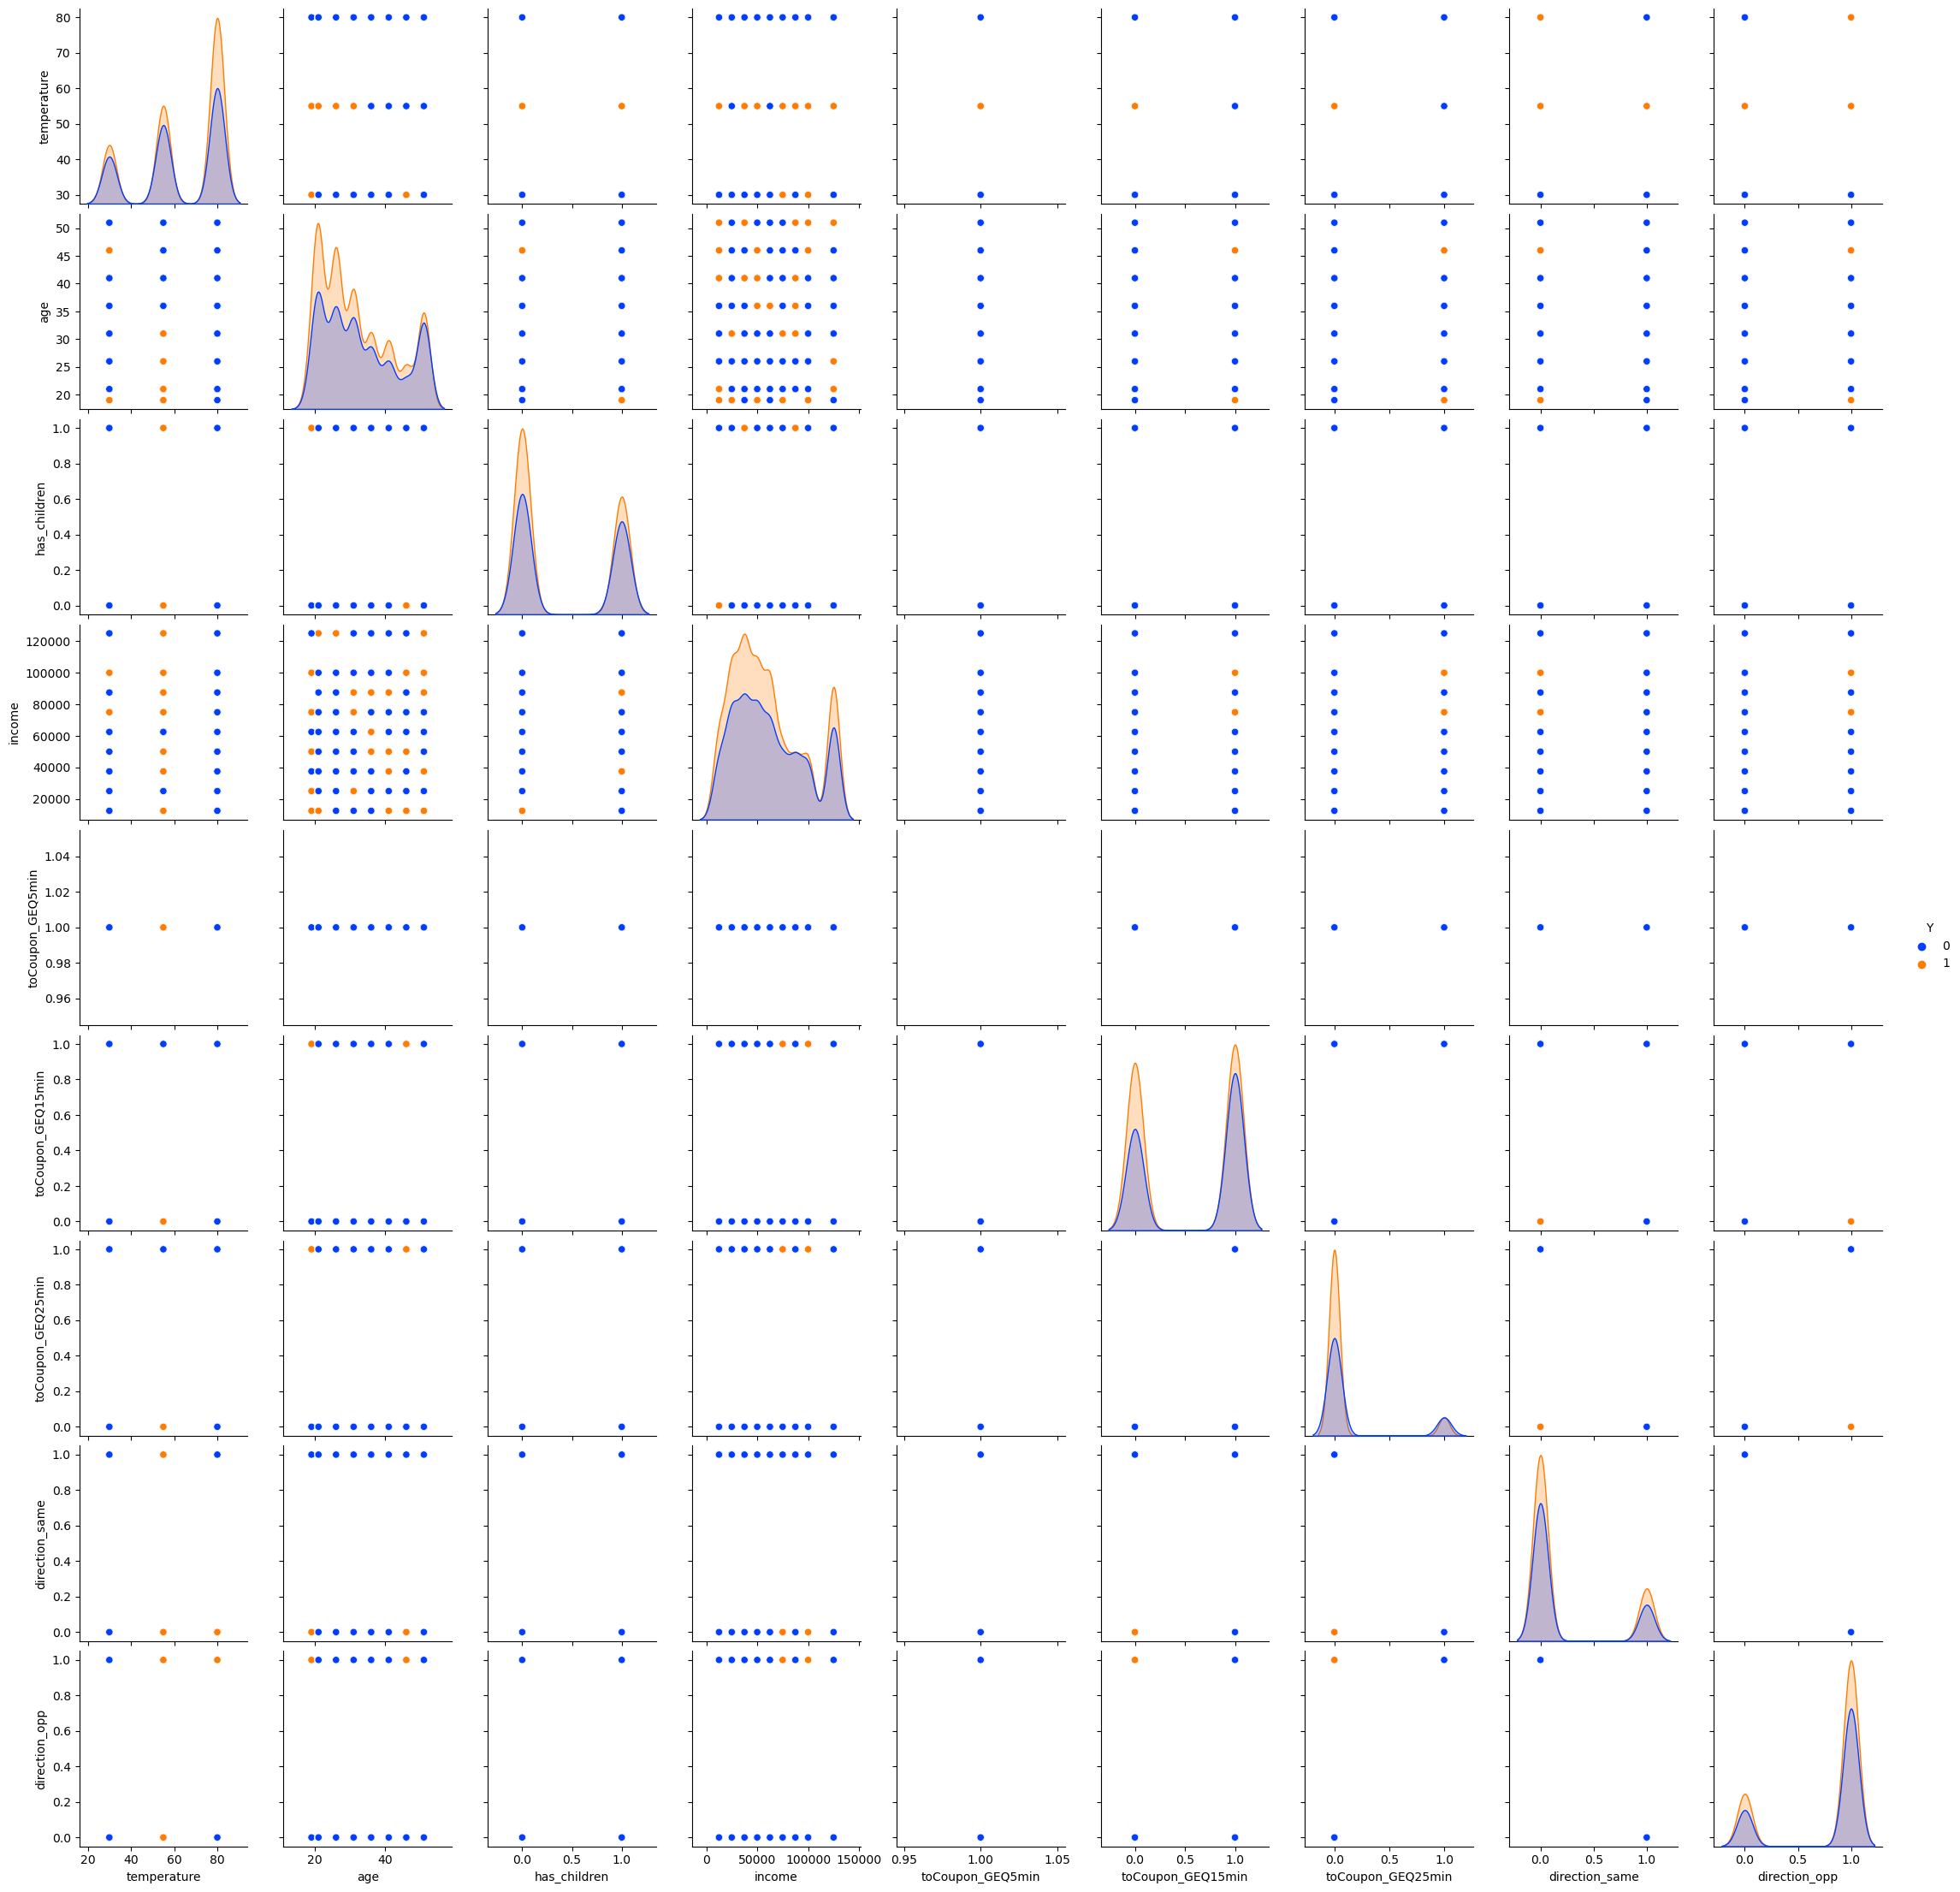

In [16]:
sns.pairplot(data,hue="Y")
# Look for correlations to identify key variables and eliminate highly correlated variables

<AxesSubplot:xlabel='toCoupon_GEQ5min', ylabel='Count'>

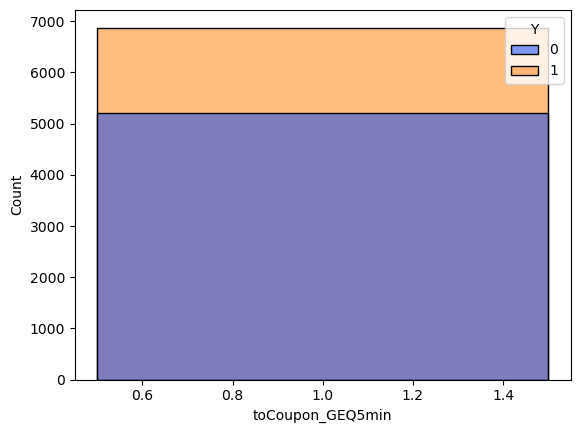

In [17]:
sns.histplot(data,x='toCoupon_GEQ5min',hue='Y')

<AxesSubplot:xlabel='temperature', ylabel='Density'>

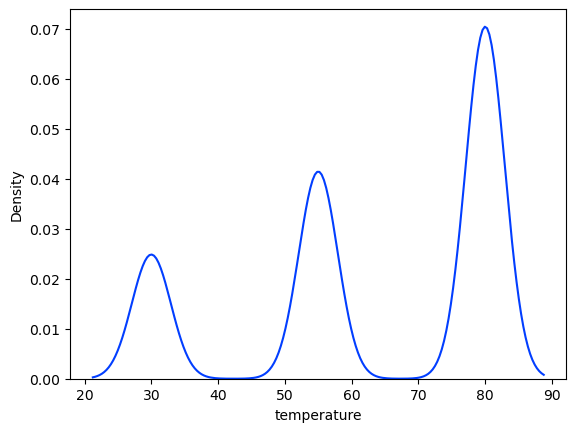

In [18]:
sns.kdeplot(data=data['temperature'])

<AxesSubplot:xlabel='time', ylabel='Count'>

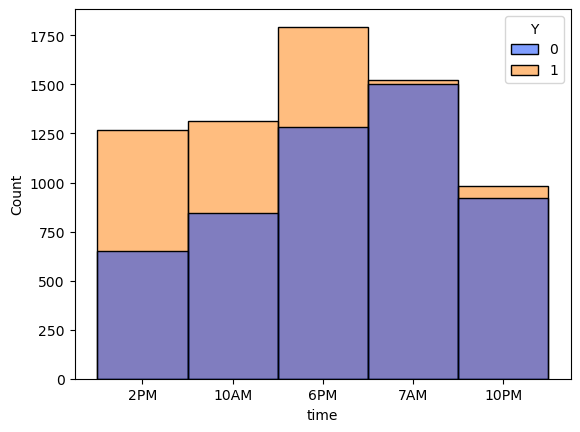

In [19]:
sns.histplot(data=data,x='time',hue='Y')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1913 entries, 24 to 12682
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           1913 non-null   object
 1   passanger             1913 non-null   object
 2   weather               1913 non-null   object
 3   temperature           1913 non-null   int64 
 4   time                  1913 non-null   object
 5   coupon                1913 non-null   object
 6   expiration            1913 non-null   object
 7   gender                1913 non-null   object
 8   age                   1913 non-null   int64 
 9   maritalStatus         1913 non-null   object
 10  has_children          1913 non-null   int64 
 11  education             1913 non-null   object
 12  occupation            1913 non-null   object
 13  income                1913 non-null   int64 
 14  Bar                   1913 non-null   object
 15  CoffeeHouse           1913 non-null 

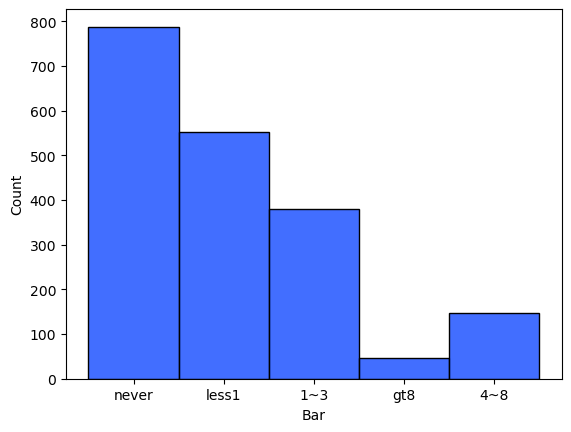

In [20]:
#create new data frame with only entries that specify Bar coupons
bardata=data.loc[data['coupon'] == "Bar"]
# use histogram and info to confirm dataset looks reasonable
# and that distribution of values of Bar look sane.  gt8 value looks slightly low, but is reasonable for our use case
sns.histplot(data=bardata,x='Bar')
bardata.info()

4. What proportion of the total observations chose to accept the coupon? 



In [21]:
# Because Yes is 1, and No is 0, we can take the sum over the length of the column to get the total number accepted:

print(int(100*(data["Y"].sum()/data["Y"].shape[0])),'% of total observations were Accepted')


56 % of total observations were Accepted


2. What proportion of bar coupons were accepted?


In [22]:

# total number of responses
total_count=bardata['Y'].shape[0]   

# total number of accepted (we know because value of Y is 1)
yes_count=bardata[['Y']].loc[bardata['Y'] == 1].shape[0] 

# calculate ratio.  
#Note that we know we can use total number of responses based on histogram showing only 1 and 0 in the data.
bar_yes_ratio=yes_count/total_count

#calculate and print the percentage as total_accepted)/total_responses
#ratio=((bardata[['Y']].loc[bardata['Y'] == 1].shape[0])/bardata['Y'].shape[0]) 
print(int(bar_yes_ratio*100),'% of bar coupons were Accepted')

41 % of bar coupons were Accepted


[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

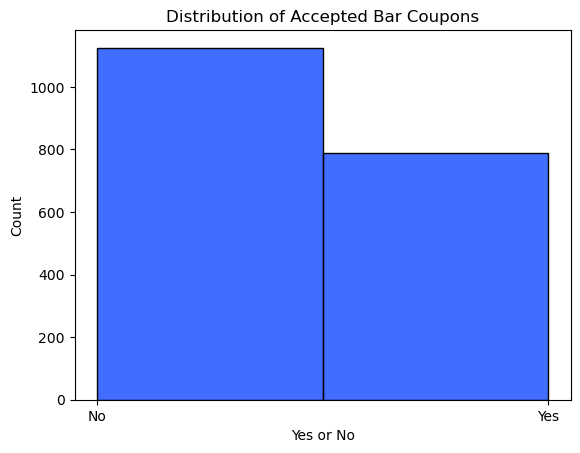

In [23]:
#use seaborn histogram to show answer to question
axb=sns.histplot(data=bardata, x="Y",bins=2)
axb.set_title("Distribution of Accepted Bar Coupons")
axb.set_xlabel("Yes or No")
axb.set_xticks(range(2))
axb.set_xticklabels(['No','Yes'])

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [24]:
# Use list to parse out cohorts of responders based on bar attendence frequency
visits=('4~8','gt8')

# count accepts for cohort that visits more than 3x month 
gt3_accepts=(bardata.loc[(bardata.Bar.isin(visits))]['Y'].value_counts())[1]  
gt3_rejects=(bardata.loc[(bardata.Bar.isin(visits))]['Y'].value_counts())[0]  

# count accepts for cohort that visits less than 3x month 
lt3_accepts=(bardata.loc[~(bardata.Bar.isin(visits))]['Y'].value_counts())[1]
lt3_rejects=(bardata.loc[~(bardata.Bar.isin(visits))]['Y'].value_counts())[0]

#debug
#print((bardata.loc[(bardata.Bar.isin(visits))]['Y'].value_counts()))  # debug
#print((bardata.loc[(~bardata.Bar.isin(visits))]['Y'].value_counts())) #debug

# convert to percentages
gt3_accept_rate=int(100*(gt3_accepts/(gt3_accepts+ gt3_rejects)))
lt3_accept_rate=int(100*(lt3_accepts/(lt3_accepts+ lt3_rejects)))

#print results- note that results do not add up to 100% because they are unique cohorts
print('Frequent bar goers accept',gt3_accept_rate,'% of coupons.','\n')
print('Less Frequent bar goers accept',lt3_accept_rate,'% of coupons.','\n')


Frequent bar goers accept 76 % of coupons. 

Less Frequent bar goers accept 37 % of coupons. 



4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [25]:

## TO REMOVE ###

# replace string values to and convert age columnn to integer type to enable analysis
#bardata.loc[bardata.age == '50plus','age']='51'
#bardata.loc[bardata.age == 'below21','age']='19'
#bardata.astype({'age': 'int64'}).dtypes
#bardata = bardata.astype({"age": int})

# review results to ensure conversion worked, inspect type and that we have reasonable distribution
#sns.histplot(data=bardata,x='age')

#print(bardata['age'].value_counts())
#print(bardata['age'].value_counts().sum())


In [26]:
# Use list called barfly to filter those who go to bar > 1x a month
barfly=('1~3','4~8','gt8')

#combine results within barflies and are over 25 as "old barflies" series
old_barflies=(bardata.loc[(bardata.Bar.isin(barfly)) & (bardata.age > 25)]['Y'].value_counts()) #old barflies

#Calculate cohort of "others" as the entire dataset minus old_barflies
others=(bardata['Y'].value_counts())-( bardata.loc[bardata.Bar.isin(barfly) &(bardata.age > 25)]['Y'].value_counts())
(print(old_barflies,'/n',others))


1    278
0    125
Name: Y, dtype: int64 /n 0    1000
1     510
Name: Y, dtype: int64


In [27]:
#Merge and format results as a new dataframe called cohort for plotting

cohorts=pd.merge(others, old_barflies, right_index = True,
               left_index = True)

#Rename Columns to improve labeling
cohorts=cohorts.rename(columns={'Y_x': 'General','Y_y': 'Over 30 Bar Goers'})

#transpose series to simplify plotting
cohorts=cohorts.transpose()

#Rename Columns to improve labeling
cohorts=cohorts.rename(columns={0: 'Rejected',1: 'Accepted'})

#Calculate percetages of barfolk and general cohorts who accepted coupons and save as a new column "Accept Rate"
cohorts['Accept_rate']=(100*cohorts['Accepted']/(cohorts['Accepted']+cohorts['Rejected'])).astype(int)

#  Reset index to create Cohort Column for better plotting
# if statement ensures reindex is idempotent, as running twice will throw errors
if len(cohorts.columns) == 3:
  cohorts.reset_index(inplace=True)
  cohorts=cohorts.rename(columns={'index': 'Cohort'})

print(cohorts.head())


              Cohort  Rejected  Accepted  Accept_rate
0            General      1000       510           33
1  Over 30 Bar Goers       125       278           68


[]

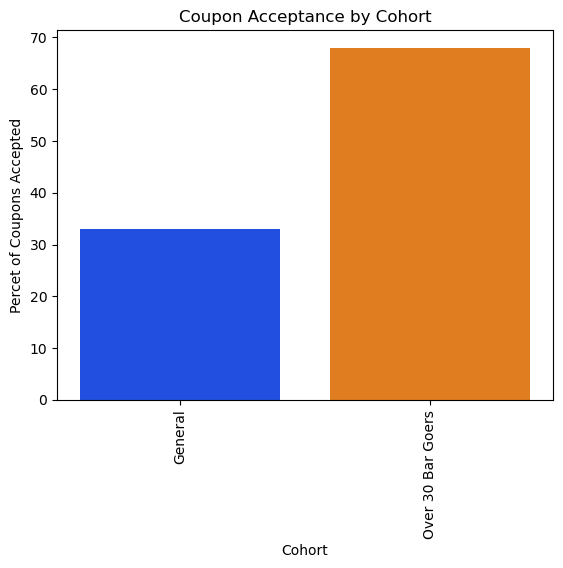

In [28]:
    
#plot with Seaborn
sns.set_palette("bright")
ax4=sns.barplot(data=cohorts,x='Cohort', y='Accept_rate')
ax4.set_title('Coupon Acceptance by Cohort')
ax4.set_ylabel('Percet of Coupons Accepted')
ax4.tick_params(axis='x', rotation=90)
ax4.set_ylim()
ax4.plot()

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [29]:
# use list to isolate requested occupation and passenger cohorts
f=('Farming Fishing & Forestry','Kid(s)')

# New cohort counts occupation not in list 'f' and passenger not in 'f'
no_kids=(bardata.loc[~bardata.occupation.isin(f)&(~bardata.passanger.isin(f)) & (bardata.Bar.isin(barfly))]['Y'].value_counts())
print(no_kids)


1    376
0    154
Name: Y, dtype: int64


In [30]:
#add no_kids results to cohort dataframe  
cohorts.loc[len(cohorts)]=['No_Kids',no_kids[0],no_kids[1],((100*no_kids[1]/(no_kids[0]+no_kids[1])).astype(int))]
print(cohorts.head())

              Cohort  Rejected  Accepted  Accept_rate
0            General      1000       510           33
1  Over 30 Bar Goers       125       278           68
2            No_Kids       154       376           70


[]

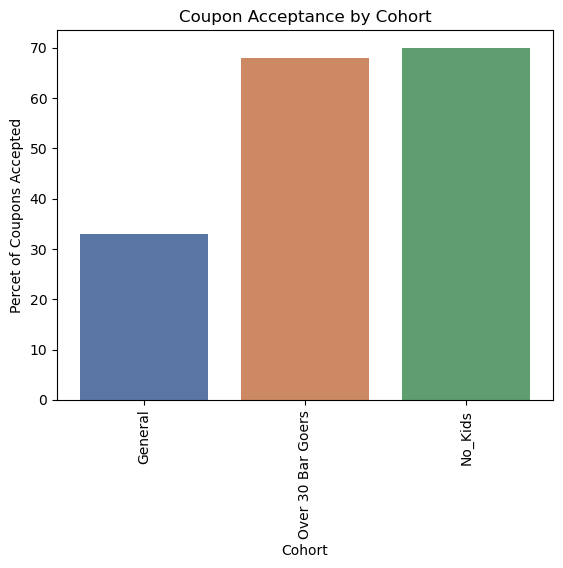

In [31]:
sns.set_palette("deep")
ax5=sns.barplot(data=cohorts,x='Cohort', y='Accept_rate')
ax5.set_title('Coupon Acceptance by Cohort')
ax5.set_ylabel('Percet of Coupons Accepted')
ax5.tick_params(axis='x', rotation=90)
ax5.set_ylim()
ax5.plot()

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [32]:
#use lt1x_month list to identify results where drivers go to bars < 1x month
lt1x_month=('4~8','gt8')
monthly= (bardata.loc[(~bardata.Bar.isin(lt1x_month))]['Y'].value_counts())

#count drivers < 30 yearas old
under30= (bardata.loc[(bardata.age < 30)]['Y'].value_counts())

print(monthly,'\n',under30)
print(monthly[0])

0    1079
1     641
Name: Y, dtype: int64 
 0    433
1    413
Name: Y, dtype: int64
1079


In [33]:
#add less than 3 month bar goer results to barfolk dataframe
cohorts.loc[len(cohorts)]=['Less_Than_3_Months',monthly[0],monthly[1],((100*monthly[1]/(monthly[0]+monthly[1])).astype(int))]

#add under 30 results to dataframe
cohorts.loc[len(cohorts)]=['Under_30',under30[0],under30[1],((100*under30[1]/(under30[0]+under30[1])).astype(int))]

print(cohorts.head())

               Cohort  Rejected  Accepted  Accept_rate
0             General      1000       510           33
1   Over 30 Bar Goers       125       278           68
2             No_Kids       154       376           70
3  Less_Than_3_Months      1079       641           37
4            Under_30       433       413           48


[]

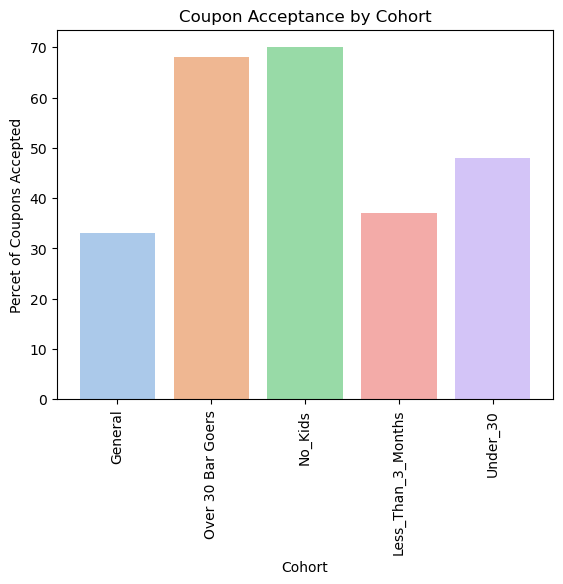

In [34]:
#plot with Seaborn
sns.set_palette("pastel")
ax7=sns.barplot(data=cohorts,x='Cohort', y='Accept_rate')
ax7.set_title('Coupon Acceptance by Cohort')
ax7.set_ylabel('Percet of Coupons Accepted')
ax7.tick_params(axis='x', rotation=90)
ax7.set_ylim()
ax7.plot()

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

In [35]:
print('The data above shows that drivers who regularly go to bars several times a month, and drivers with no children, accept the bar coupons more frequently.')  


The data above shows that drivers who regularly go to bars several times a month, and drivers with no children, accept the bar coupons more frequently.


### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [36]:
slist=('Student','foo')
students=(bardata.loc[bardata.occupation.isin(slist)]['Y'].value_counts())
students_Accepted=bardata.loc[bardata.occupation.isin(slist)]['Y'].sum()
students_Total=bardata.loc[bardata.occupation.isin(slist)]['Y'].shape[0]
ratio=100*(students_Accepted/students_Total)
print(ratio,'%')

48.10126582278481 %


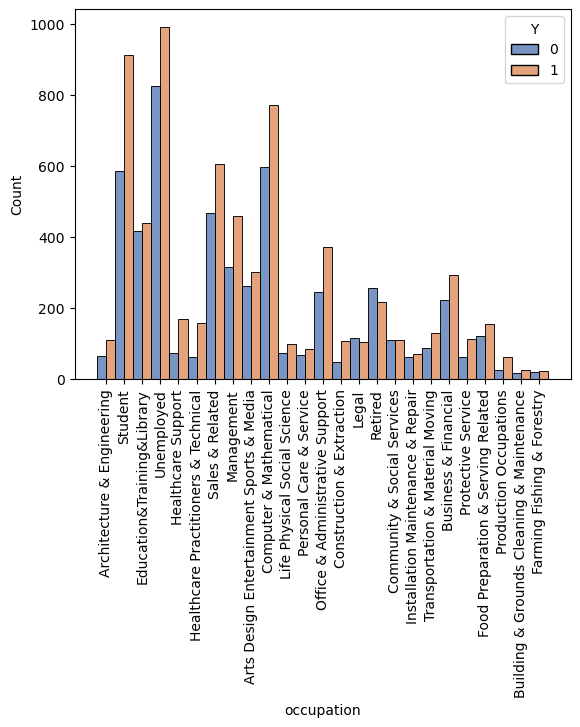

In [37]:
axq = sns.histplot(data, x='occupation', hue='Y', multiple='dodge',palette='deep')
axq.tick_params(axis='x', rotation=90)

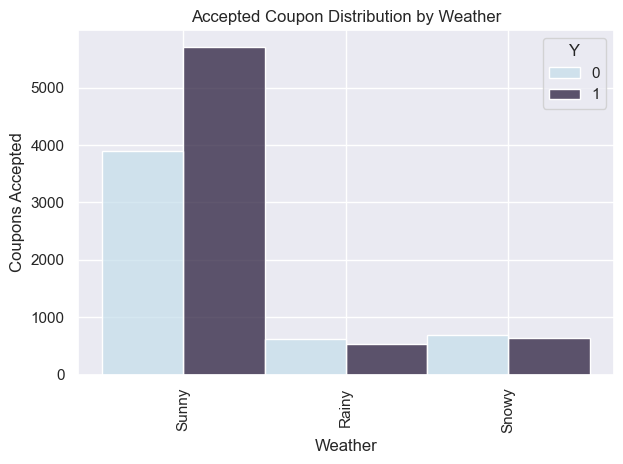

In [103]:
axweather = sns.histplot(data, x='weather', hue='Y', multiple='dodge',palette="ch:s=.25,rot=-.25")
axweather.tick_params(axis='x', rotation=90)
axweather.set_title('Accepted Coupon Distribution by Weather')
axweather.set_ylabel('Coupons Accepted')
axweather.set_xlabel('Weather')
axweather.tick_params(axis='x', rotation=90)
axweather.figure.tight_layout()
axweather.figure.savefig('/var/local/data/Customer_Coupon/images/weather.png')


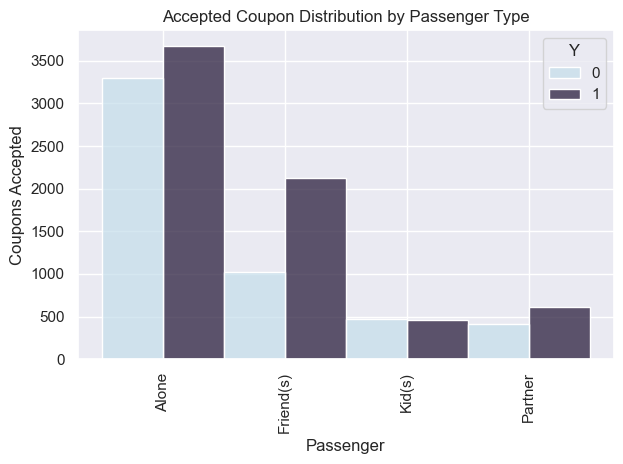

In [104]:
axpassenger = sns.histplot(data, x='passanger', hue='Y', multiple='dodge',palette="ch:s=.25,rot=-.25")
axpassenger.set_title('Accepted Coupon Distribution by Passenger Type')
axpassenger.set_ylabel('Coupons Accepted')
axpassenger.set_xlabel('Passenger')
axpassenger.tick_params(axis='x', rotation=90)
axpassenger.figure.tight_layout()
axpassenger.figure.savefig('/var/local/data/Customer_Coupon/images/passenger.png')

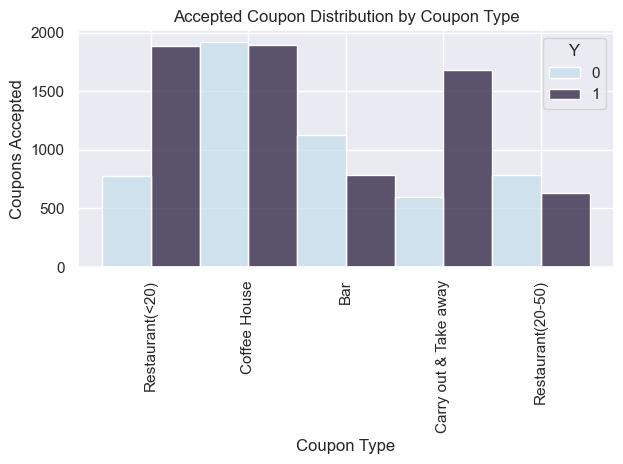

In [105]:
axcoupon = sns.histplot(data, x='coupon', hue='Y', multiple='dodge',palette="ch:s=.25,rot=-.25")
axcoupon.tick_params(axis='x', rotation=90)
axcoupon.set_title('Accepted Coupon Distribution by Coupon Type')
axcoupon.set_ylabel('Coupons Accepted')
axcoupon.set_xlabel('Coupon Type')
axcoupon.tick_params(axis='x', rotation=90)
axcoupon.figure.tight_layout()
axcoupon.figure.savefig('/var/local/data/Customer_Coupon/images/coupon.png')

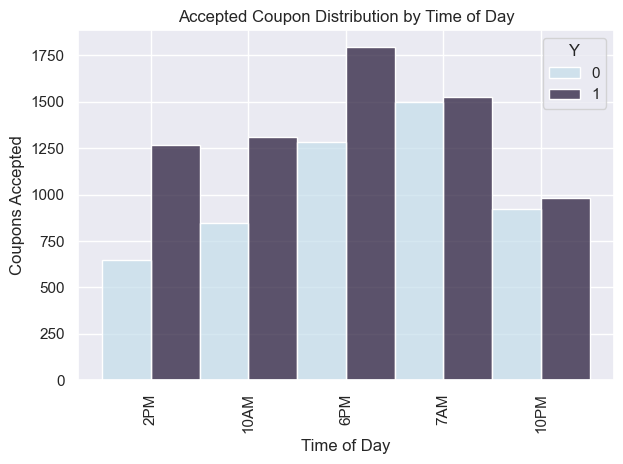

In [106]:
axtime = sns.histplot(data, x='time', hue='Y', multiple='dodge',palette="ch:s=.25,rot=-.25")
axtime.set_title('Accepted Coupon Distribution by Time of Day')
axtime.set_ylabel('Coupons Accepted')
axtime.set_xlabel('Time of Day')
axtime.tick_params(axis='x', rotation=90)
axtime.figure.tight_layout()
axtime.figure.savefig('/var/local/data/Customer_Coupon/images/time.png')


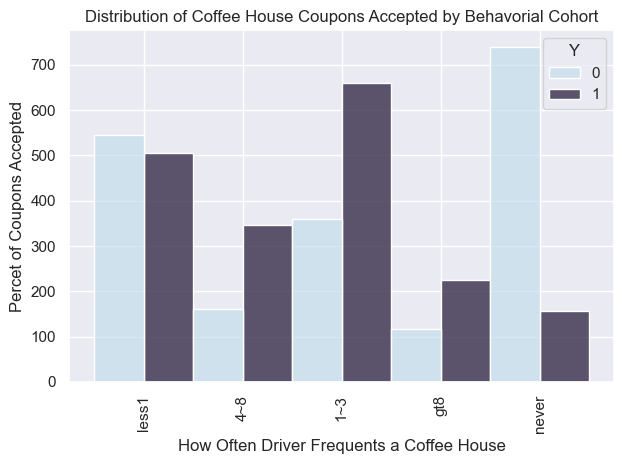

In [107]:
axcoffee = sns.histplot(data.loc[data.coupon == 'Coffee House'], x='CoffeeHouse',hue='Y', multiple='dodge',palette="ch:s=.25,rot=-.25")
axcoffee.tick_params(axis='x', rotation=90)
axcoffee.set_title('Distribution of Coffee House Coupons Accepted by Behavorial Cohort')
axcoffee.set_ylabel('Percet of Coupons Accepted')
axcoffee.set_xlabel('How Often Driver Frequents a Coffee House')
axcoffee.tick_params(axis='x', rotation=90)
axcoffee.figure.tight_layout()
axcoffee.figure.savefig('/var/local/data/Customer_Coupon/images/CoffeeHouse.png')


In [51]:
#Calculate ratio of Accepted Coupons per Occupation

dfoy= pd.DataFrame((data.loc[data.Y == 1][['Y','occupation']].groupby('occupation').value_counts()))
dfoy.index = dfoy.index.set_names(['Occupation', 'Y'])
dfoy.reset_index(inplace=True)
dfoy.columns = ['Occupation', 'Y', 'Accepted']
dfoy=dfoy.drop(columns=['Y'])

dfon= pd.DataFrame((data.loc[data.Y == 0][['Y','occupation']].groupby('occupation').value_counts()))
dfon.index = dfon.index.set_names(['Occupation', 'Y'])
dfon.reset_index(inplace=True)
dfon.columns = ['Occupation', 'Y', 'Rejected']
dfon=dfon.drop(columns=['Y'])

dfo=pd.merge(dfoy,dfon,on='Occupation')
dfo['Accept_Rate']=(100*(dfo['Accepted']/(dfo['Accepted']+dfo['Rejected']))).astype(int)
dfo=dfo.sort_values(by=['Accept_Rate'])
print(dfo.head())
    
    
    
    


                           Occupation  Accepted  Rejected  Accept_Rate
20                            Retired       216       257           45
13                              Legal       103       116           47
4         Community & Social Services       109       110           49
7          Education&Training&Library       439       416           51
12  Installation Maintenance & Repair        71        62           53


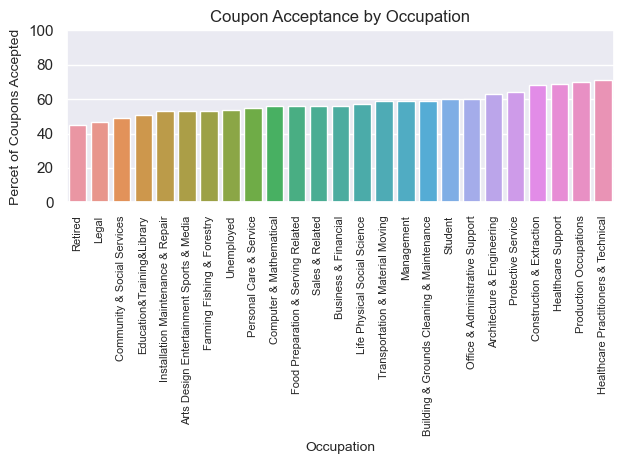

In [144]:
sns.set_palette("bright") 
axoccupation=sns.barplot(data=dfo,x='Occupation', y='Accept_Rate') 
axoccupation.set_title('Coupon Acceptance by Occupation') 
axoccupation.set_ylabel('Percet of Coupons Accepted',fontsize=10) 
axoccupation.set_xlabel('Occupation',fontsize=10) 
axoccupation.tick_params(axis='x', rotation=90,labelsize=8) 
axoccupation.set_ylim(0,100) 
axoccupation.figure.tight_layout()
axoccupation.figure.savefig('/var/local/data/Customer_Coupon/images/occupation.png')


In [113]:
print(data['income'].value_counts())


37500     1919
25000     1728
125000    1692
50000     1689
62500     1565
12500     1014
75000      840
100000     818
87500      814
Name: income, dtype: int64


In [114]:


# Use list called low to select healthcare workers
healthcare_worker=('Healthcare Support','Healthcare Practitioners & Technical')

#Select Healthcare workers with medium to low salaries
hcw=(data.loc[(data.occupation.isin(healthcare_worker)) & (bardata.income < 74_000)]['Y'].value_counts()) #old barflies
hcw_accept_rate=hcw[1]/(hcw[0]+hcw[1])
#Calculate accept rate as a percentage
print(hcw_accept_rate)
print(hcw)

0.6181818181818182
1    34
0    21
Name: Y, dtype: int64


In [115]:
# Use list called low to select healthcare workers
healthcare_worker=('Healthcare Support','Healthcare Practitioners & Technical')

dfhcw=(data.loc[(data.occupation.isin(healthcare_worker))]) 
hcw_accept=pd.DataFrame((100*(dfhcw.groupby('income')['Y'].sum()/dfhcw.groupby('income')['Y'].count())).astype(int))

#hcw_accept.index = dfon.index.set_names(['Occupation', 'Y'])
hcw_accept.reset_index(inplace=True)
#hcw_accept.columns = ['Occupation', 'Y', 'Rejected']
print(hcw_accept.head())
#print(dfhcw.groupby('income')['Y'].count())
#Calculate cohort of "others" as the entire dataset minus old_barflies
#others=(bardata['Y'].value_counts())-( bardata.loc[bardata.Bar.isin(barfly) &(bardata.age > 25)]['Y'].value_counts())


   income   Y
0   12500  45
1   25000  49
2   37500  88
3   50000  79
4   62500  59


(1.0, 92.4)

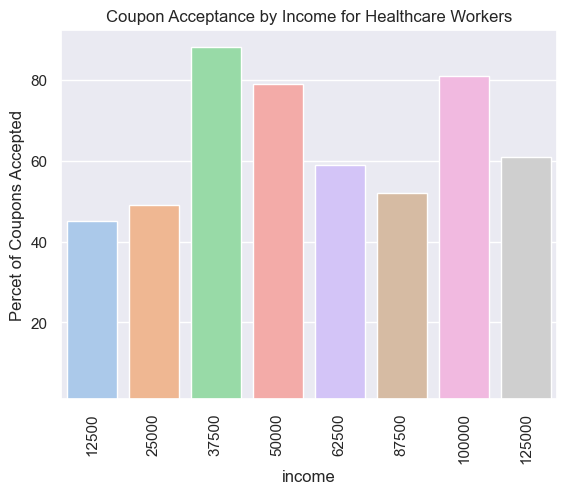

In [116]:
sns.set_palette("pastel")
ax7h=sns.barplot(data=hcw_accept,x='income', y='Y')
ax7h.set_title('Coupon Acceptance by Income for Healthcare Workers')
ax7h.set_ylabel('Percet of Coupons Accepted')
ax7h.tick_params(axis='x', rotation=90)
ax7h.set_ylim(1)

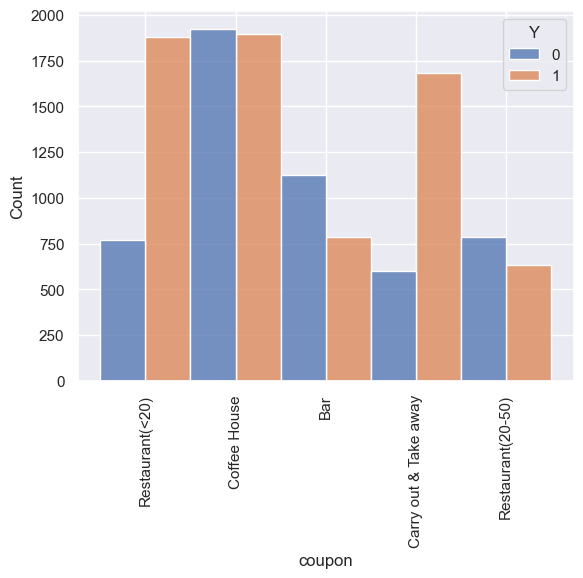

In [117]:
axq = sns.histplot(data, x='coupon', hue='Y', multiple='dodge',palette='deep')
axq.tick_params(axis='x', rotation=90)

NameError: name 'ax' is not defined

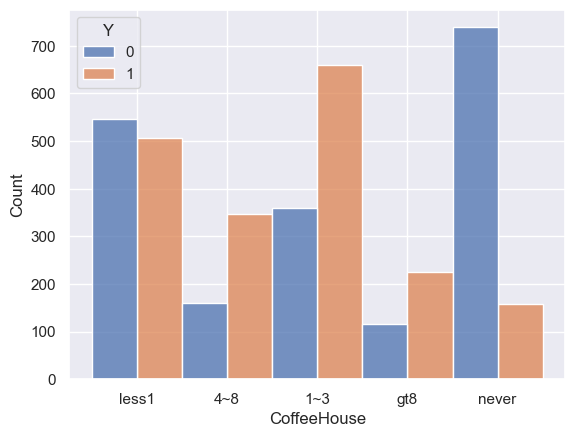

In [118]:
axcoffee = sns.histplot(data.loc[data.coupon == 'Coffee House'], x='CoffeeHouse', hue='Y', multiple='dodge',palette='deep')
ax.tick_params(axis='x', rotation=90)

In [119]:
df_all_coffee=data.loc[(data.coupon == 'Coffee House')]
print(int(100*(df_all_coffee["Y"].sum()/df_all_coffee["Y"].shape[0])),'% of Coffe House coupons were Accepted by the entier cohort')
df_coffee=data.loc[(data.coupon == 'Coffee House') & (data.CoffeeHouse == '4~8')]
#print(df_carry.head())
print(int(100*(df_coffee["Y"].sum()/df_coffee["Y"].shape[0])),'% of Carry Away coupons were Accepted by those who frequent Carry Away 4-8 times a month')

49 % of Coffe House coupons were Accepted by the entier cohort
68 % of Carry Away coupons were Accepted by those who frequent Carry Away 4-8 times a month


75 % of Carry Away coupons were Accepted by those who frequent Carry Away 4-8 times a month


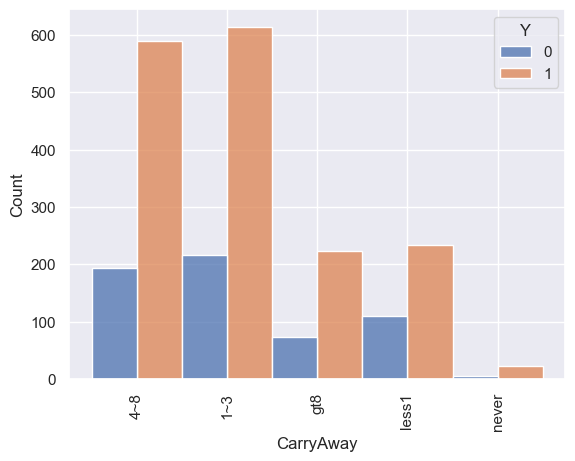

In [120]:
axcarry = sns.histplot(data.loc[data.coupon == 'Carry out & Take away'], x='CarryAway', hue='Y', multiple='dodge',palette='deep')
axcarry.tick_params(axis='x', rotation=90)
df_carry=data.loc[(data.coupon == 'Carry out & Take away') & (data.CarryAway == '4~8')]
#print(df_carry.head())
print(int(100*(df_carry["Y"].sum()/df_carry["Y"].shape[0])),'% of Carry Away coupons were Accepted by those who frequent Carry Away 4-8 times a month')

In [121]:
print(data['coupon'].value_counts())

Coffee House             3816
Restaurant(<20)          2653
Carry out & Take away    2280
Bar                      1913
Restaurant(20-50)        1417
Name: coupon, dtype: int64


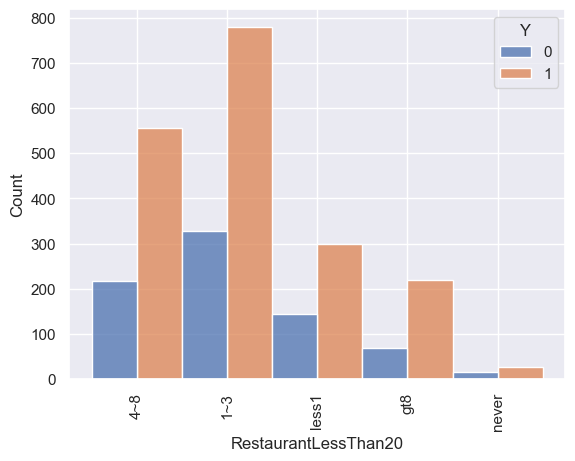

In [122]:
axcarry = sns.histplot(data.loc[data.coupon == 'Restaurant(<20)'], x='RestaurantLessThan20', hue='Y', multiple='dodge',palette='deep')
axcarry.tick_params(axis='x', rotation=90)

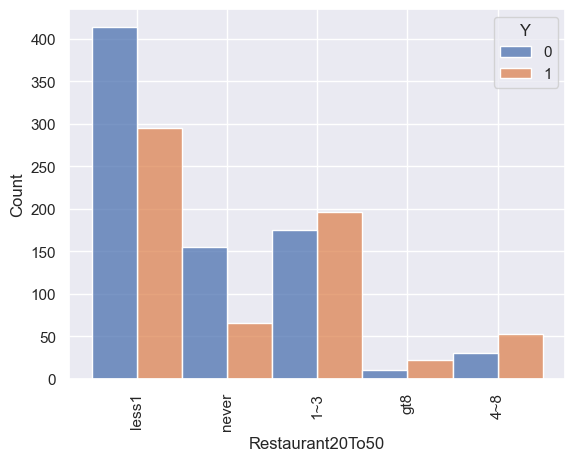

In [123]:
axcarry = sns.histplot(data.loc[data.coupon == 'Restaurant(20-50)'], x='Restaurant20To50', hue='Y', multiple='dodge',palette='deep')
axcarry.tick_params(axis='x', rotation=90)

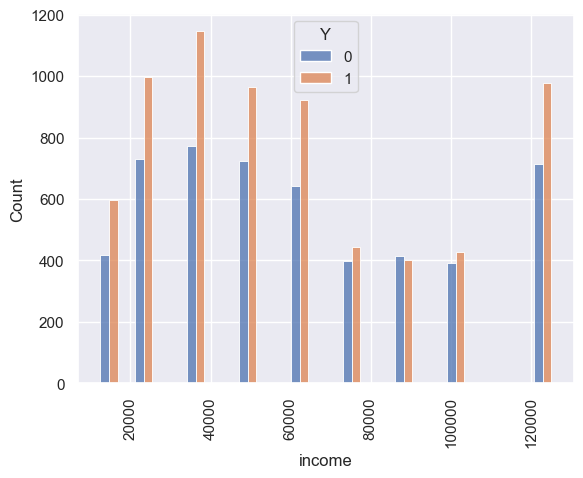

In [124]:
axq = sns.histplot(data, x='income', hue='Y', multiple='dodge',palette='deep')
axq.tick_params(axis='x', rotation=90)

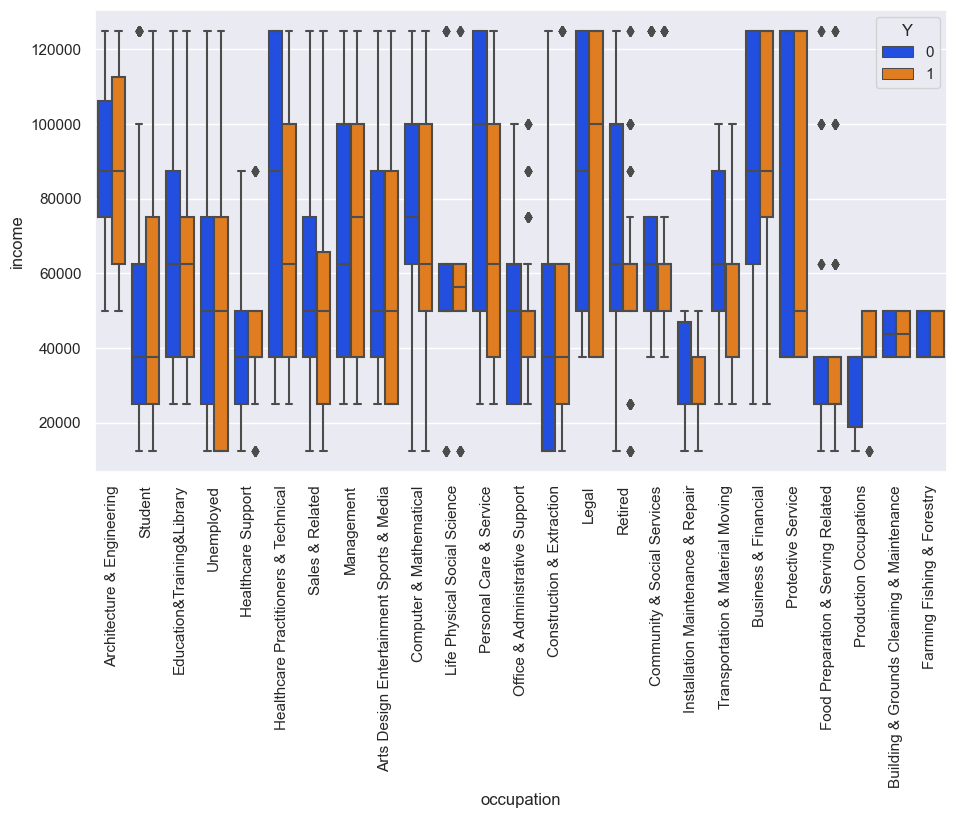

In [125]:
#plot income by occupation
fig, axz = plt.subplots(figsize=(11, 6))
axz=sns.boxplot(
    x='occupation', 
    y='income', 
    data=data,
    palette='bright',
    hue='Y');
axz.tick_params(axis='x', rotation=90)
plt.show()

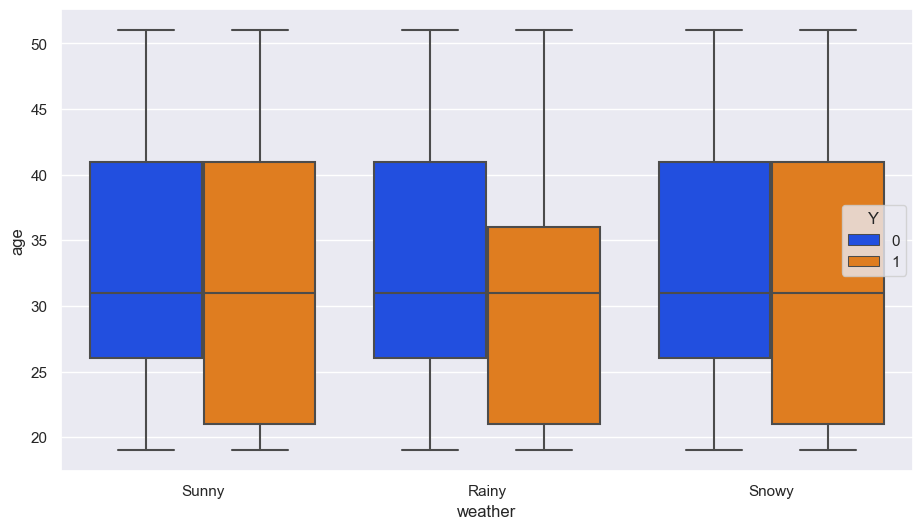

In [126]:
#plot income by occupation
fig, axzz = plt.subplots(figsize=(11, 6))
axzz=sns.boxplot(
    x='weather', 
    y='age', 
    data=data,
    palette='bright',
    hue='Y');
axz.tick_params(axis='x', rotation=90)
plt.show()

In [127]:
control= int(100*(data["Y"].sum()/data["Y"].shape[0]))
print(control,'% of total observations were Accepted by the general cohort')


56 % of total observations were Accepted by the general cohort


In [128]:
targets=('Sunny','Healthcare Support','Healthcare Practitioners & Technical','Friend(s)')
time=("2PM","")

dft=(data.loc[(data.time.isin(time))])
ctime= int(100*(dft["Y"].sum()/dft["Y"].shape[0]))
print(ctime,'% of total observations were Accepted at 2pm')


dfp=(data.loc[(data.passanger.isin(targets))])
passenger= int(100*(dfp["Y"].sum()/dfp["Y"].shape[0]))
print(passenger,'% of total observations were Accepted by drivers with a passenger')

dfh=(data.loc[(data.occupation.isin(targets))])
hc_workers=int(100*(dfh["Y"].sum()/dfh["Y"].shape[0]))
print(hc_workers,'% of total observations were Accepted by healthcare workers')

dfht=(dfh.loc[(dfh.time.isin(time))])
hc_workers_time=int(100*(dfht["Y"].sum()/dfht["Y"].shape[0]))
print(hc_workers_time,'% of total observations were Accepted at 2pm by healthcare workers')

dfhp=(dfh.loc[(dfh.passanger.isin(targets))])
hc_workers_passenger= int(100*(dfhp["Y"].sum()/dfhp["Y"].shape[0]))
print(hc_workers_passenger,'% of total observations were Accepted by healthcare workers with a passenger')

dfhpt=(dfhp.loc[(dfhp.time.isin(time))])
hc_workers_passenger_time= int(100*(dfhpt["Y"].sum()/dfhpt["Y"].shape[0]))
print(hc_workers_passenger_time,'% of total observations were Accepted by healthcare worker with a passenger at 2pm')

# Code below can be used as a test.  Result should be same as above (93%)
#dfhtp=(dfht.loc[(dfht.passanger.isin(targets))])
#hc_passenger_workers_time= int(100*(dfhtp["Y"].sum()/dfhtp["Y"].shape[0]))
#print(hc_passenger_workers_time,'% of total observations were Accepted by healthcare worker with a passenger at 2pm')



66 % of total observations were Accepted at 2pm
67 % of total observations were Accepted by drivers with a passenger
70 % of total observations were Accepted by healthcare workers
86 % of total observations were Accepted at 2pm by healthcare workers
84 % of total observations were Accepted by healthcare workers with a passenger
93 % of total observations were Accepted by healthcare worker with a passenger at 2pm


<AxesSubplot:xlabel='time', ylabel='Count'>

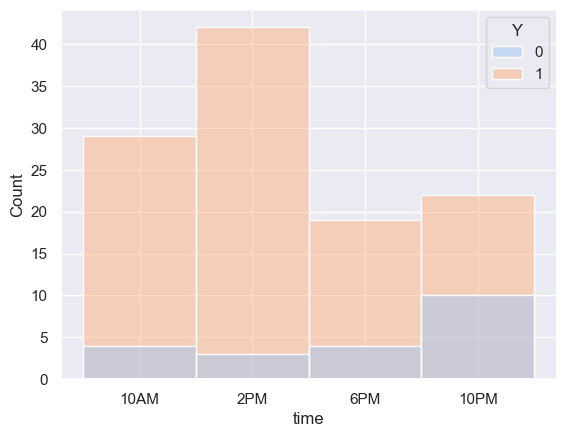

In [129]:
sns.histplot(data=dfhp,x='time',hue='Y')

In [130]:
df_new=pd.DataFrame([{'All Coupons':'', "2PM":'','Passengers':'','Health_Workers':'','Health_Workers_w_Friend':'','Health_Workers_2PM':'','Health_Workers_w_Friend_2PM':''}])
df_new[0:]=[control,ctime,passenger,hc_workers,hc_workers_passenger,hc_workers_time,hc_workers_passenger_time]

#df_new.columns=['All Coupons', 'Passengers', 'Healthcare Workers', 'Healthcare Workers with Passengers']
#l=[control,'test',hc_workers,hc_workers_passenger]
#df_opt.iloc[0]=l
print(df_new)


  All Coupons 2PM Passengers Health_Workers Health_Workers_w_Friend  \
0          56  66         67             70                      84   

  Health_Workers_2PM Health_Workers_w_Friend_2PM  
0                 86                          93  


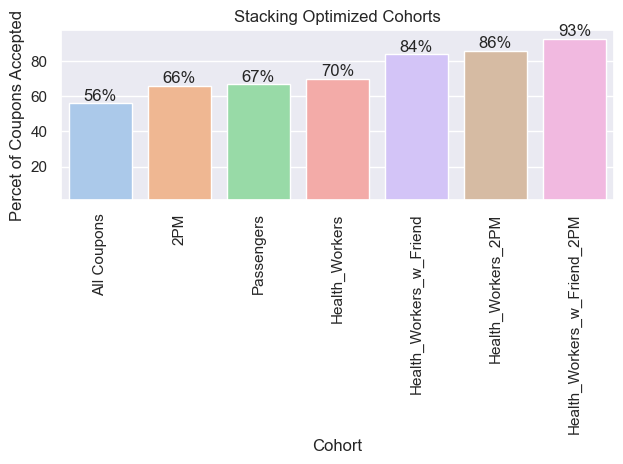

In [149]:
sns.set_palette("pastel")
axhc=sns.barplot(data=df_new)
axhc.set_title('Stacking Optimized Cohorts')
axhc.set_ylabel('Percet of Coupons Accepted')
axhc.set_xlabel('Cohort')
axhc.tick_params(axis='x', rotation=90)
axhc.set_ylim(1);
axhc.bar_label(axhc.containers[0], fmt='%.f%%');
axhc.figure.tight_layout()
axhc.figure.savefig('/var/local/data/Customer_Coupon/images/summary.png')



In [69]:
dfc=(data.loc[(data.coupon.isin(targets))])
#print(int(100*(dfc["Y"].sum()/dfc["Y"].shape[0])),'% of carry out and take away coupons were Accepted')
print(dfc.head())
rest=('Restaurant(<20)','')
dfr=(data.loc[(data.coupon.isin(rest))])
print(dfr.head())
#print(int(100*(dfr["Y"].sum()/dfr["Y"].shape[0])),'% of cheap restaurant coupons were Accepted')



Empty DataFrame
Columns: [destination, passanger, weather, temperature, time, coupon, expiration, gender, age, maritalStatus, has_children, education, occupation, income, Bar, CoffeeHouse, CarryAway, RestaurantLessThan20, Restaurant20To50, toCoupon_GEQ5min, toCoupon_GEQ15min, toCoupon_GEQ25min, direction_same, direction_opp, Y]
Index: []

[0 rows x 25 columns]
        destination  passanger weather  temperature time           coupon  \
22  No Urgent Place      Alone   Sunny           55  2PM  Restaurant(<20)   
29  No Urgent Place  Friend(s)   Sunny           80  2PM  Restaurant(<20)   
31  No Urgent Place  Friend(s)   Sunny           80  6PM  Restaurant(<20)   
42             Work      Alone   Sunny           55  7AM  Restaurant(<20)   
44  No Urgent Place      Alone   Sunny           55  2PM  Restaurant(<20)   

   expiration gender  age maritalStatus  ...  CoffeeHouse CarryAway  \
22         1d   Male   21        Single  ...        less1       4~8   
29         1d   Male   21       

In [ ]:
#dfz=(data.loc[(data.occupation.isin(targets))])#63%
#dfz=(data.loc[(data.coupon.isin(targets))]) #76%
#dfz=(data.loc[(data.weather.isin(targets))]) #60%
#dfz=(data.loc[(data.passanger.isin(targets))]) #67%
print(dfz["Y"].value_counts())

In [ ]:
fig, axzs = plt.subplots(figsize=(11, 6))
axzs=sns.boxplot(
    x='coupon', 
    y='income', 
    data=dfs,
    palette='bright',
    hue='Y');
axzs.tick_params(axis='x', rotation=90)
plt.show()

In [ ]:

axq = sns.histplot(data, x='passanger', hue='Y', multiple='dodge',palette='deep')
axq.tick_params(axis='x', rotation=90)

In [ ]:
axq = sns.histplot(data, x='weather', hue='Y', multiple='dodge',palette='deep')
axq.tick_params(axis='x', rotation=90)